In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sales = pd.read_csv("/content/drive/MyDrive/career_mentoring/sales.csv")
product = pd.read_csv("/content/drive/MyDrive/career_mentoring/product.csv")
region = pd.read_csv("/content/drive/MyDrive/career_mentoring/region.csv")
reseller = pd.read_csv("/content/drive/MyDrive/career_mentoring/reseller.csv")


In [3]:
# Gabungkan data
merged_df = (
    sales.merge(reseller, on='reseller_key', how='left')
         .merge(region, on='sales_teritory_key', how='left')
         .merge(product, on='product_key', how='left')
)

# Melihat beberapa baris pertama setelah gabungan
merged_df.head()

,sales_key,sales_order_number,order_date,product_key,reseller_key,employee_key,sales_teritory_key,quantity,unit_price,sales,...,name_y,country_y,group,name,standard_cost,color,subcategory,category,background_color_format,font_color_format
0,1,SO43897,2017-08-25,235,312,282,4,2,$28.84,$57.68,...,Southwest,United States,North America,"Long-Sleeve Logo Jersey, XL",$31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000
1,2,SO43897,2017-08-25,351,312,282,4,2,"$2,024.99","$4,049.98",...,Southwest,United States,North America,"Mountain-100 Black, 48","$1,898.09",Black,Mountain Bikes,Bikes,#000000,#FFFFFF
2,3,SO43897,2017-08-25,348,312,282,4,2,"$2,024.99","$4,049.98",...,Southwest,United States,North America,"Mountain-100 Black, 38","$1,898.09",Black,Mountain Bikes,Bikes,#000000,#FFFFFF
3,4,SO43897,2017-08-25,232,312,282,4,2,$28.84,$57.68,...,Southwest,United States,North America,"Long-Sleeve Logo Jersey, L",$31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000
4,5,SO44544,2017-11-18,292,312,282,4,2,$818.7,"$1,637.4",...,Southwest,United States,North America,"HL Mountain Frame - Silver, 48",$706.81,Silver,Mountain Frames,Components,#C0C0C0,#000000


In [19]:
merged_df.cost.dtype

dtype('float64')

In [17]:
# Bersihkan simbol '$' dan koma ',' serta konversi ke tipe data float
for col in ['sales', 'cost']:
    merged_df[col] = merged_df[col].replace({'\$': '', ',': ''}, regex=True)
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


In [7]:
# Periksa tipe data kolom setelah konversi
print(merged_df.dtypes)

# Periksa beberapa nilai pertama untuk memastikan konversi berhasil
print(merged_df[['sales', 'cost']].head())


sales_key                    int64
sales_order_number          object
order_date                  object
product_key                  int64
reseller_key                 int64
employee_key                 int64
sales_teritory_key           int64
quantity                     int64
unit_price                  object
sales                      float64
cost                       float64
name_x                      object
bussiness_type              object
city                        object
state_province              object
country_x                   object
name_y                      object
country_y                   object
group                       object
name                        object
standard_cost               object
color                       object
subcategory                 object
category                    object
background_color_format     object
font_color_format           object
dtype: object
     sales     cost
0    57.68    63.45
1  4049.98  3796.19
2  4049.98  3796

In [23]:
merged_df['profit_margin'] = ((merged_df['sales'] - merged_df['cost']) / merged_df['sales']) * 100

#cetak
merged_df[['sales', 'cost', 'profit_margin']].head()

,sales,cost,profit_margin
0,57.68,63.45,-10.003467
1,4049.98,3796.19,6.266451
2,4049.98,3796.19,6.266451
3,57.68,63.45,-10.003467
4,1637.40,1413.62,13.666789


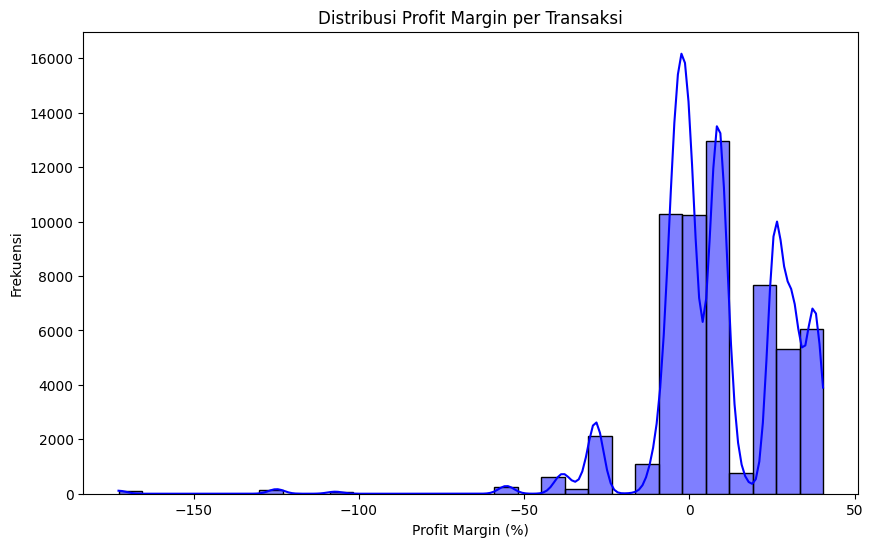

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['profit_margin'], bins=30, kde=True, color='blue')
plt.title('Distribusi Profit Margin per Transaksi')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frekuensi')
plt.show()


In [25]:
# Total sales per reseller
reseller_sales = merged_df.groupby('name')['sales'].sum().reset_index()

# Tambahkan kolom persentase kontribusi
total_sales = reseller_sales['sales'].sum()
reseller_sales['contribution_percent'] = (reseller_sales['sales'] / total_sales) * 100

# Urutkan berdasarkan kontribusi
reseller_sales = reseller_sales.sort_values(by='contribution_percent', ascending=False)

# Lihat hasil
print(reseller_sales.head())

                        name       sales  contribution_percent
142   Mountain-200 Black, 38  2944665.88              3.797189
143   Mountain-200 Black, 42  2517355.08              3.246166
145  Mountain-200 Silver, 38  2240091.34              2.888630
146  Mountain-200 Silver, 42  2108685.83              2.719181
147  Mountain-200 Silver, 46  2038938.83              2.629241


<ipython-input-26-e86a2e6e712e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contribution_percent', y='name', data=reseller_sales.head(10), palette='viridis')


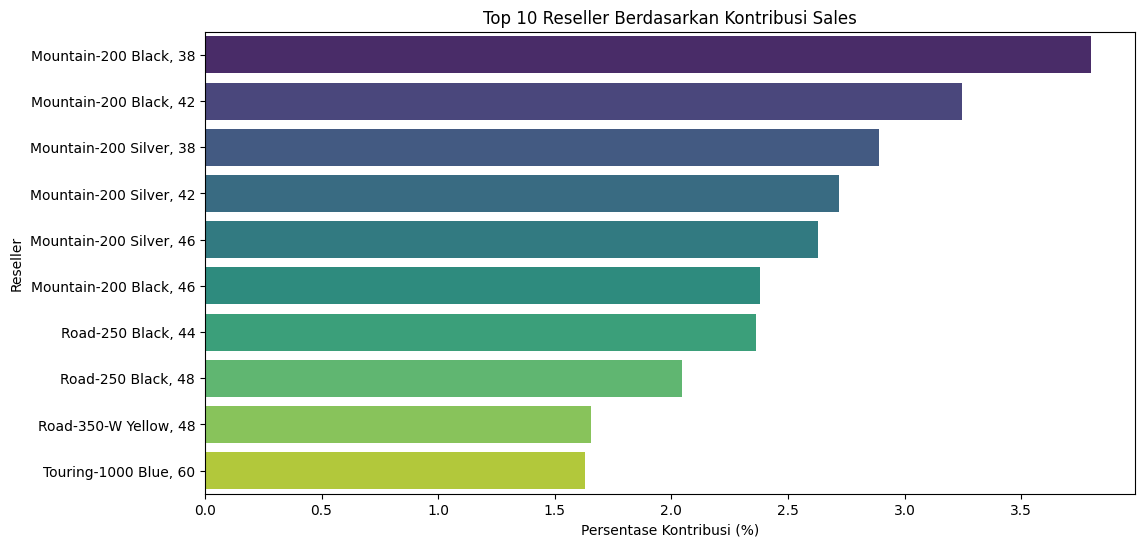

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='contribution_percent', y='name', data=reseller_sales.head(10), palette='viridis')
plt.title('Top 10 Reseller Berdasarkan Kontribusi Sales')
plt.xlabel('Persentase Kontribusi (%)')
plt.ylabel('Reseller')
plt.show()

In [27]:
# Total sales per region
region_sales = merged_df.groupby('name_x')['sales'].sum().reset_index()
region_sales = region_sales.rename(columns={'name_x': 'region_name'})

# Lihat hasil
print(region_sales.sort_values(by='sales', ascending=False).head())


                   region_name      sales
57            Brakes and Gears  882273.53
559    Totes & Baskets Company  817125.03
442                Retail Mall  803767.27
601  Vigorous Exercise Company  794909.73
139  Excellent Riding Supplies  773398.22


<ipython-input-44-5e91c0a1389d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contribution_percent', y='name', data=reseller_sales.tail(10), palette='viridis')


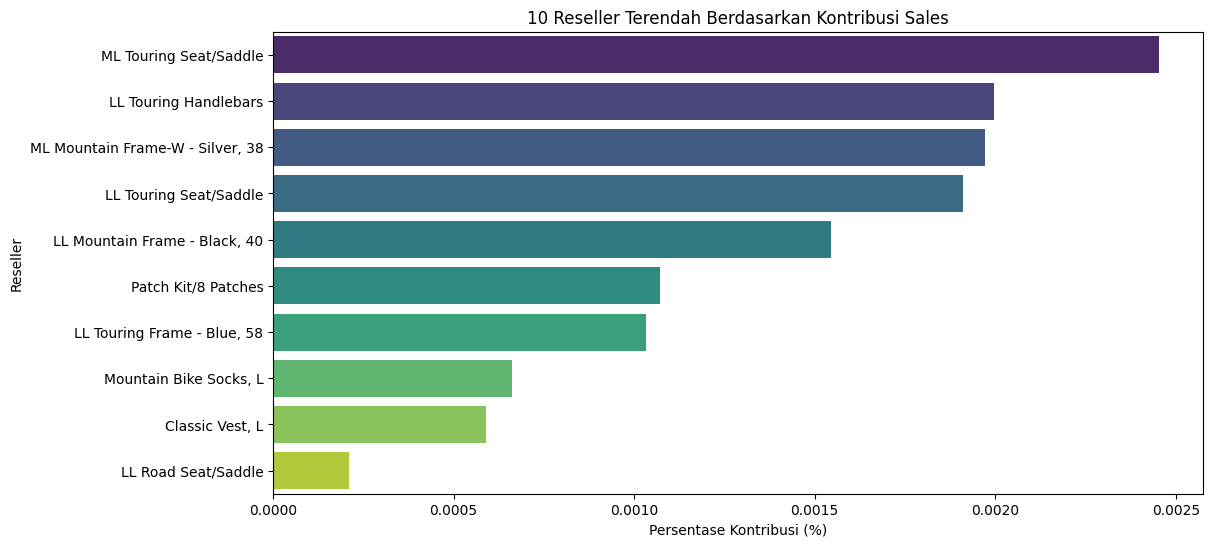

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='contribution_percent', y='name', data=reseller_sales.tail(10), palette='viridis')
plt.title('10 Reseller Terendah Berdasarkan Kontribusi Sales')
plt.xlabel('Persentase Kontribusi (%)')
plt.ylabel('Reseller')
plt.show()